In [59]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

sys.path.append('/home/ci411/pcen-t-varying/')

import pcen_t.eval

wet_mel_model711 (Ongoing)


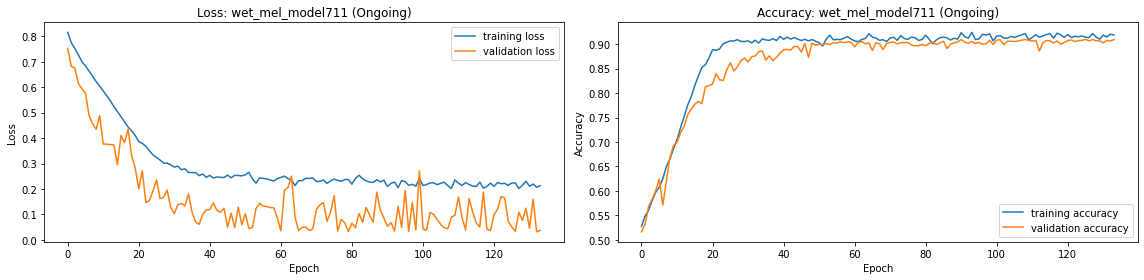

dry_0123456789_model711 (Done)
dry_012345678_model711 (Done)
dry_01234567_model711 (Done)
dry_0123456_model711 (Done)
dry_012345_model711 (Done)
dry_01234_model711 (Done)
dry_0123_model711 (Done)
dry_012_model711 (Done)
dry_01_model711 (Done)
dry_0_model711 (Done)
dry_12345678_model711 (Done)
dry_1_model711 (Done)
dry_234567_model711 (Done)
dry_2_model711 (Done)
dry_3456_model711 (Done)
dry_3_model711 (Done)
dry_45_model711 (Done)
dry_4_model711 (Done)
dry_5_model711 (Done)
dry_6_model711 (Done)
dry_7_model711 (Done)
dry_8_model711 (Done)
dry_9_model711 (Done)
dry_mel_model711 (Done)
realreverb_0123456789_model711 (Done)
realreverb_012345678_model711 (Done)
realreverb_01234567_model711 (Done)
realreverb_0123456_model711 (Done)
realreverb_012345_model711 (Done)
realreverb_01234_model711 (Done)
realreverb_0123_model711 (Done)
realreverb_012_model711 (Done)
realreverb_01_model711 (Done)
realreverb_0_model711 (Done)
realreverb_12345678_model711 (Done)
realreverb_1_model711 (Done)
realrever

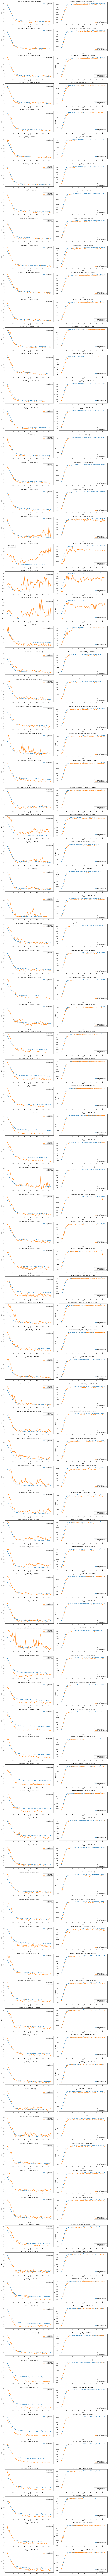

In [61]:
models_dir = "/beegfs/ci411/pcen/models/models_711/"
files_to_check = os.listdir(models_dir)

history_csv =  "/beegfs/ci411/pcen/models/models_711/{}/history_csvlog.csv"
history_pkl = "/beegfs/ci411/pcen/models/models_711/{}/history.pkl"



completed = []

incomplete = []

for file in files_to_check:
    if os.path.exists(history_csv.format(file)):
        incomplete.append(file)
    elif os.path.exists(history_pkl.format(file)):
        completed.append(file)
    else:
        print("{} (NO FILE)".format(file))

        
number_of_plots = len(incomplete)
fig, ax = plt.subplots(nrows=number_of_plots, ncols=2, figsize = (16, 4*number_of_plots))

for i, file in enumerate(np.sort(incomplete)):
    history_loc = history_csv.format(file)
    history = pd.read_csv(history_loc)
    title = "{} (Ongoing)".format(file)
    print(title)
    
    if number_of_plots>1:
        # Visualize training history
        ax[i,0].plot(history['loss'], label='training loss')
        ax[i,0].plot(history['val_loss'], label='validation loss')

        ax[i,0].set_xlabel('Epoch')
        ax[i,0].set_ylabel('Loss')
        ax[i,0].set_title('Loss: {}'.format(title))
        ax[i,0].legend()   

        ax[i,1].plot(history['accuracy'], label='training accuracy')
        ax[i,1].plot(history['val_accuracy'], label='validation accuracy')

        ax[i,1].set_xlabel('Epoch')
        ax[i,1].set_ylabel('Accuracy')
        ax[i,1].set_title('Accuracy: {}'.format(title))
        ax[i,1].legend()   
        plt.tight_layout()
        plt.show()
    elif number_of_plots==1:
        ax[0].plot(history['loss'], label='training loss')
        ax[0].plot(history['val_loss'], label='validation loss')

        ax[0].set_xlabel('Epoch')
        ax[0].set_ylabel('Loss')
        ax[0].set_title('Loss: {}'.format(title))
        ax[0].legend()   

        ax[1].plot(history['accuracy'], label='training accuracy')
        ax[1].plot(history['val_accuracy'], label='validation accuracy')

        ax[1].set_xlabel('Epoch')
        ax[1].set_ylabel('Accuracy')
        ax[1].set_title('Accuracy: {}'.format(title))
        ax[1].legend()   
        plt.tight_layout()
        plt.show()

number_of_plots = len(completed)
fig, ax = plt.subplots(nrows=number_of_plots, ncols=2, figsize = (16, 4*number_of_plots))
        
for i, file in enumerate(np.sort(completed)):
    with open(history_pkl.format(file), 'rb') as fp:
        history = pickle.load(fp)
    title = "{} (Done)".format(file)
    print(title)
    
    # Visualize training history
    ax[i,0].plot(history['loss'], label='training loss')
    ax[i,0].plot(history['val_loss'], label='validation loss')

    ax[i,0].set_xlabel('Epoch')
    ax[i,0].set_ylabel('Loss')
    ax[i,0].set_title('Loss: {}'.format(title))
    ax[i,0].legend()   

    ax[i,1].plot(history['accuracy'], label='training accuracy')
    ax[i,1].plot(history['val_accuracy'], label='validation accuracy')

    ax[i,1].set_xlabel('Epoch')
    ax[i,1].set_ylabel('Accuracy')
    ax[i,1].set_title('Accuracy: {}'.format(title))
    ax[i,1].legend()   
    plt.tight_layout()

plt.show()